Importing Libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

CSV File Import

In [ ]:
df=pd.read_csv('insurance.csv')

In [ ]:
df.shape

(1338, 7)

First Few Rows of Dataset

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Preprocessing and Exploratory Data Analysis (EDA)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['children'].unique()


array([0, 1, 3, 2, 5, 4])

In [ ]:
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
df.duplicated().sum()

1

In [ ]:
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)


     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [ ]:
df.drop(index=[581], inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.loc[195]

,195
age,19
sex,male
bmi,30.59
children,0
smoker,no
region,northwest
charges,1639.5631


In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Visualization

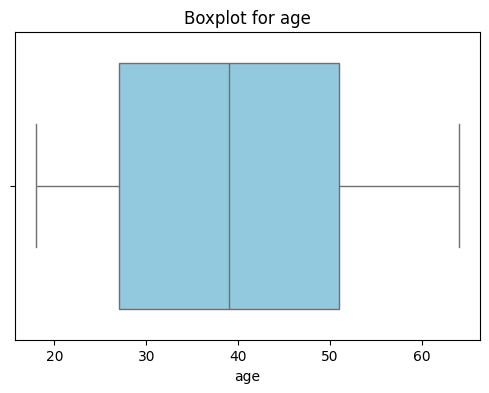

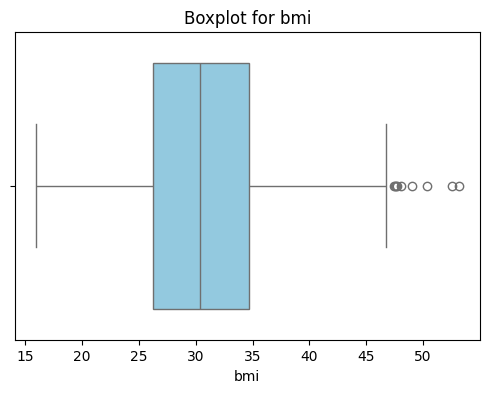

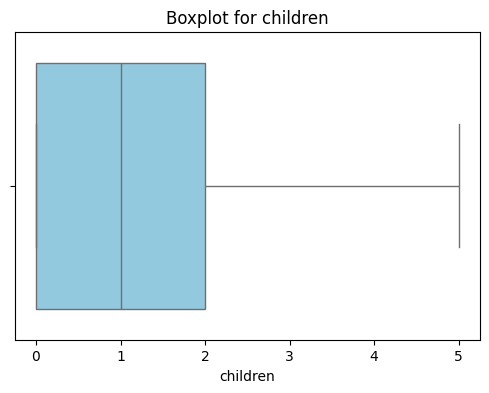

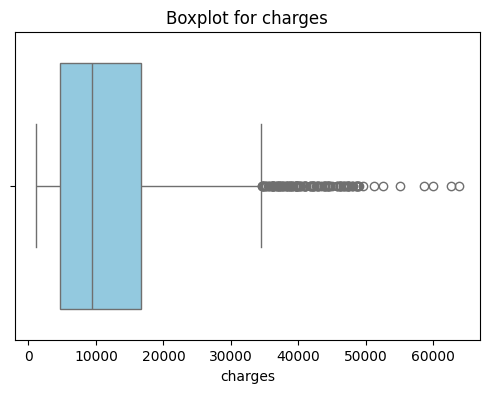

In [ ]:

#checking for outliers
numerical_features = ['age', 'bmi', 'children', 'charges']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [ ]:
#identifying Outliers Using IQR
#IQR = Intequrtile Range
#numerical_features means all the list of columns  in the df that are numerical
Q1 = df[numerical_features].quantile(0.25) #calculating Q1
Q3 = df[numerical_features].quantile(0.75) #calulating Q3
IQR = Q3 - Q1 #calculating IQR this represents middle 50% of the data

# Define outlier thresholds (1.5*IQR rule)
#1.5 is standard threshold  used to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound))

In [ ]:
outliers.sum()

,0
age,0
bmi,9
children,0
charges,139


In [ ]:
# outliers

In [ ]:
bmi_outliers = df[outliers['bmi']]['bmi']
charges_outliers = df[outliers['charges']]['charges']

In [ ]:
bmi_outliers

,bmi
116,49.06
286,48.07
401,47.52
543,47.41
847,50.38
860,47.60
1047,52.58
1088,47.74
1317,53.13


In [ ]:
charges_outliers

,charges
14,39611.75770
19,36837.46700
23,37701.87680
29,38711.00000
30,35585.57600
...,...
1300,62592.87309
1301,46718.16325
1303,37829.72420
1313,36397.57600


Correlation Analysis

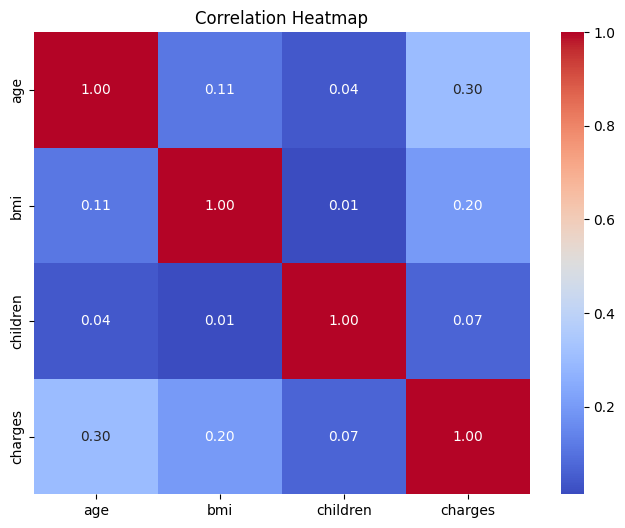

In [ ]:
#Correlation Analysis
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
pd.crosstab(df['smoker'], df['sex'], margins=True)
#from this we know there are more non-smokers than smokers in dataset

sex,female,male,All
smoker,,,
no,547,516,1063
yes,115,159,274
All,662,675,1337


In [ ]:
#1. Analyze Trends in Categorical Variables
# Unique value counts
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

# Average charges by category
print(df.groupby('sex')['charges'].mean())
print(df.groupby('smoker')['charges'].mean())
print(df.groupby('region')['charges'].mean())

sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64
smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64
region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


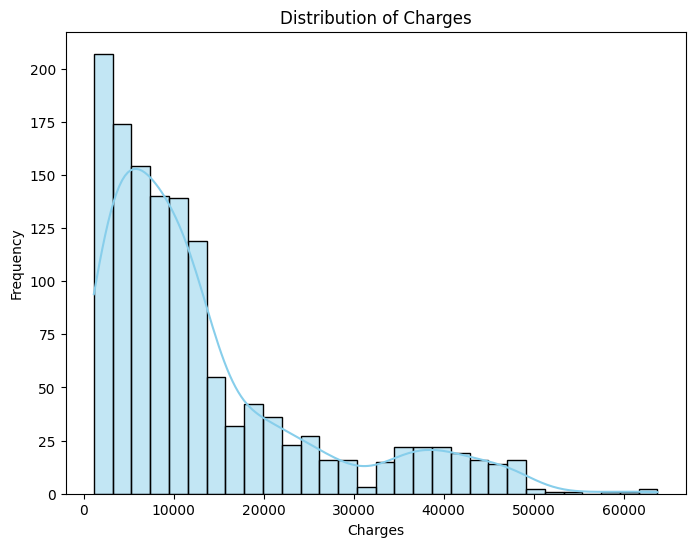

In [ ]:
#Distribution of Charges
# Distribution of Charges
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


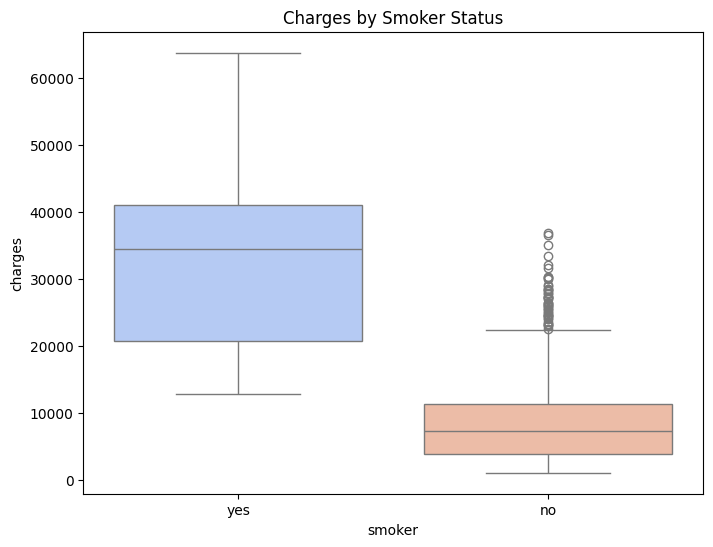

In [ ]:
#Investigate Interaction Effects
# Charges by Smoker Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', hue='smoker', data=df, palette='coolwarm', dodge=False)
plt.title('Charges by Smoker Status')
plt.legend([], [], frameon=False)  # Suppress legend as it's redundant here
plt.show()



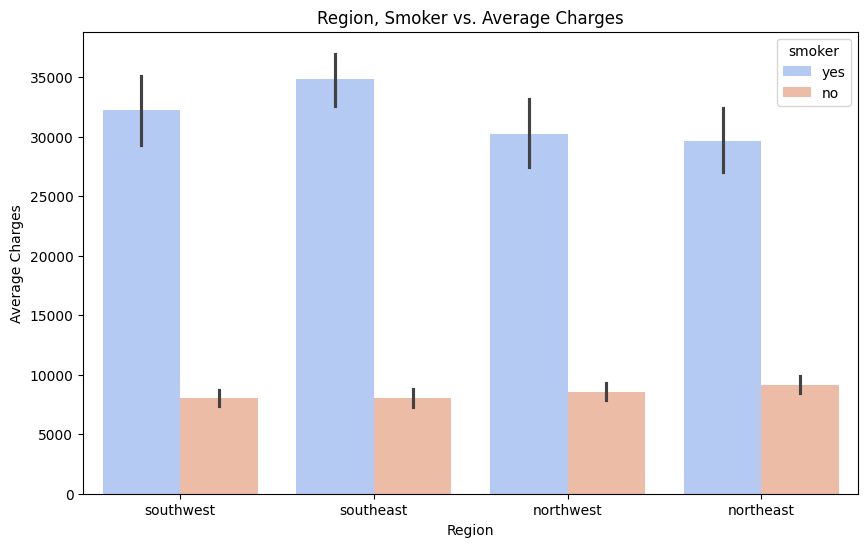

In [ ]:
# Bar Graph with hue (Region, Smoker)
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='coolwarm')
plt.title('Region, Smoker vs. Average Charges')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()


   age age_group
0   19     18-30
1   18       NaN
2   28     18-30
3   33     30-40
4   32     30-40


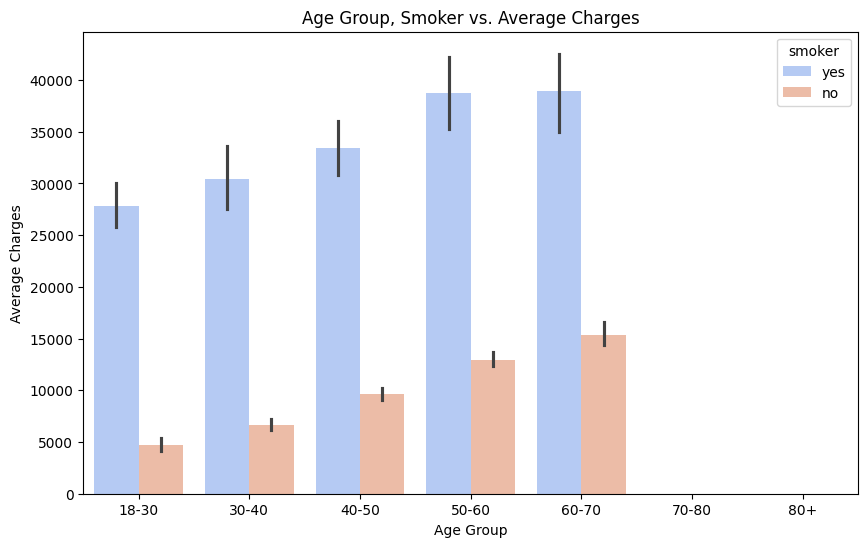

In [ ]:
# Create age bins again and check if the column is added
bins = [18, 30, 40, 50, 60, 70, 80, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Check if the 'age_group' column exists
print(df[['age', 'age_group']].head())

# Now plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='charges', hue='smoker', data=df, palette='coolwarm')
plt.title('Age Group, Smoker vs. Average Charges')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.show()


In [ ]:
df.drop('age_group', axis=1, inplace=True)

Feature Engineering

In [ ]:
#new column= smoker_bmi , if a person is smoker bmi is assigned to smoker_bmi otherwise 0
df['smoker_bmi'] = np.where(df['smoker'] == 1, df['bmi'], 0)  # BMI for smokers, 0 for non-smokers


In [ ]:
#new column= age charges  , looking towrds whether age would be a factor in medical charges
df['age_charges'] = df['age'] * df['charges']

In [ ]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[17, 19, 35, 55, np.inf],  # Define bins based on age ranges
    labels=['Teenager', 'Young Adult', 'Middle-Aged Adult', 'Senior']  # Labels for age groups
)

In [ ]:
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 25, 30, np.inf],  # Define bins for BMI classification
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']  # Labels for BMI groups
)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_bmi,age_charges,age_group,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,3.208136e+05,Teenager,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,0.0,3.105994e+04,Teenager,Obese
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.245849e+05,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,0.0,7.254875e+05,Young Adult,Normal
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.237394e+05,Young Adult,Overweight
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,5.300274e+05,Middle-Aged Adult,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,0.0,3.970765e+04,Teenager,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,2.933700e+04,Teenager,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,4.216685e+04,Young Adult,Overweight


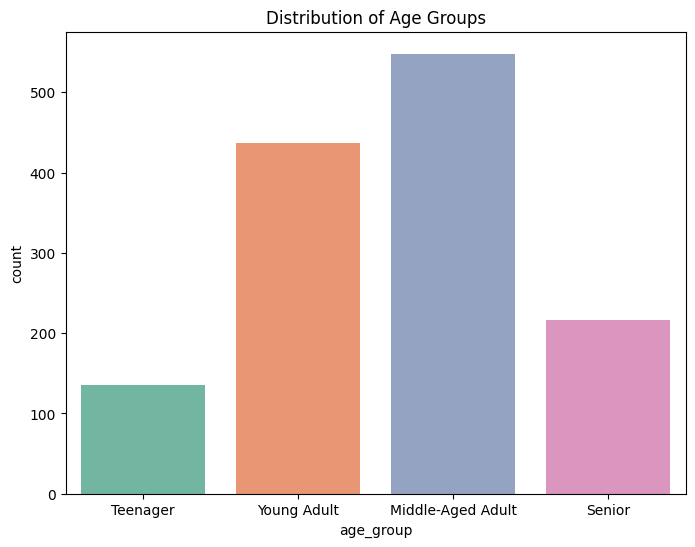

In [ ]:
#Visualization of new derived features
# Visualize the distribution of age groups
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', data=df, hue='age_group', palette='Set2', legend=False)
plt.title('Distribution of Age Groups')
plt.show()

In [ ]:
df['log_charges'] = np.log1p(df['charges'])
# logarithmic transformation , computes natural logarithm of 1+x , if we are dealing with 0 or 1

In [ ]:
threshold = df['charges'].mean() + df['charges'].std()  # Define high charges threshold
df['high_charges'] = np.where(df['charges'] > threshold, 1, 0)

In [ ]:
threshold

25389.48114300013

In [ ]:
# Count the number of rows where high_charges is 1
high_charges_count = df[df['high_charges'] == 1].shape[0]
print(f'Total number of rows with high charges: {high_charges_count}')


Total number of rows with high charges: 197


In [ ]:
df['has_children'] = np.where(df['children'] > 0, 1, 0)


In [ ]:
df['has_children'].unique()

array([0, 1])

In [ ]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [ ]:
df['bmi_category'].value_counts()


,count
bmi_category,
Obese,704
Overweight,386
Normal,226
Underweight,21


In [ ]:
df['region'].value_counts()


,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [ ]:
# # One-hot encoding for region
df = pd.get_dummies(df, columns=['region'], drop_first=False)

# # One-hot encoding for BMI category
df = pd.get_dummies(df, columns=['bmi_category'], drop_first=False)


In [ ]:
df

,age,sex,bmi,children,smoker,charges,smoker_bmi,age_charges,age_group,log_charges,high_charges,has_children,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27.900,0,1,16884.92400,0.0,3.208136e+05,Teenager,9.734236,0,0,False,False,False,True,False,False,True,False
1,18,0,33.770,1,0,1725.55230,0.0,3.105994e+04,Teenager,7.453882,0,1,False,False,True,False,False,False,False,True
2,28,0,33.000,3,0,4449.46200,0.0,1.245849e+05,Young Adult,8.400763,0,1,False,False,True,False,False,False,False,True
3,33,0,22.705,0,0,21984.47061,0.0,7.254875e+05,Young Adult,9.998137,0,0,False,True,False,False,False,True,False,False
4,32,0,28.880,0,0,3866.85520,0.0,1.237394e+05,Young Adult,8.260455,0,0,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0.0,5.300274e+05,Middle-Aged Adult,9.268755,0,1,False,True,False,False,False,False,False,True
1334,18,1,31.920,0,0,2205.98080,0.0,3.970765e+04,Teenager,7.699381,0,0,True,False,False,False,False,False,False,True
1335,18,1,36.850,0,0,1629.83350,0.0,2.933700e+04,Teenager,7.396847,0,0,False,False,True,False,False,False,False,True
1336,21,1,25.800,0,0,2007.94500,0.0,4.216685e+04,Young Adult,7.605365,0,0,False,False,False,True,False,False,True,False


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'smoker_bmi',
       'age_charges', 'age_group', 'log_charges', 'high_charges',
       'has_children', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'bmi_category_Underweight',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

Scaling and Normalization

In [ ]:

# Define columns for different scaling techniques
#used for continuous numerical values , transforms data to have mean =0 and std=1
numerical_columns_to_standardize = ['age', 'bmi', 'smoker_bmi', 'age_charges']
# for continuous features
#transform specific features to specific range in(0 and 1)
numerical_columns_to_normalize = ['charges', 'log_charges']
#features with larger ranges

# Initialize scalers
scaler = StandardScaler()   # For standardization
normalizer = MinMaxScaler() # For normalization

# Standardize selected columns
df[numerical_columns_to_standardize] = scaler.fit_transform(df[numerical_columns_to_standardize])

# Normalize selected columns
df[numerical_columns_to_normalize] = normalizer.fit_transform(df[numerical_columns_to_normalize])




In [ ]:
df

,age,sex,bmi,children,smoker,charges,smoker_bmi,age_charges,age_group,log_charges,high_charges,has_children,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.453160,0,1,0.251611,0.0,-0.425019,Teenager,0.671035,0,0,False,False,False,True,False,False,True,False
1,-1.511647,0,0.509422,1,0,0.009636,0.0,-0.916206,Teenager,0.106509,0,1,False,False,True,False,False,False,False,True
2,-0.799350,0,0.383155,3,0,0.053115,0.0,-0.757664,Young Adult,0.340920,0,1,False,False,True,False,False,False,False,True
3,-0.443201,0,-1.305052,0,0,0.333010,0.0,0.260980,Young Adult,0.736367,0,0,False,True,False,False,False,True,False,False
4,-0.514431,0,-0.292456,0,0,0.043816,0.0,-0.759097,Young Adult,0.306185,0,0,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,0.050269,3,0,0.151299,0.0,-0.070362,Middle-Aged Adult,0.555801,0,1,False,True,False,False,False,False,False,True
1334,-1.511647,1,0.206053,0,0,0.017305,0.0,-0.901547,Teenager,0.167285,0,0,True,False,False,False,False,False,False,True
1335,-1.511647,1,1.014490,0,0,0.008108,0.0,-0.919127,Teenager,0.092390,0,0,False,False,True,False,False,False,False,True
1336,-1.297958,1,-0.797524,0,0,0.014144,0.0,-0.897378,Young Adult,0.144011,0,0,False,False,False,True,False,False,True,False


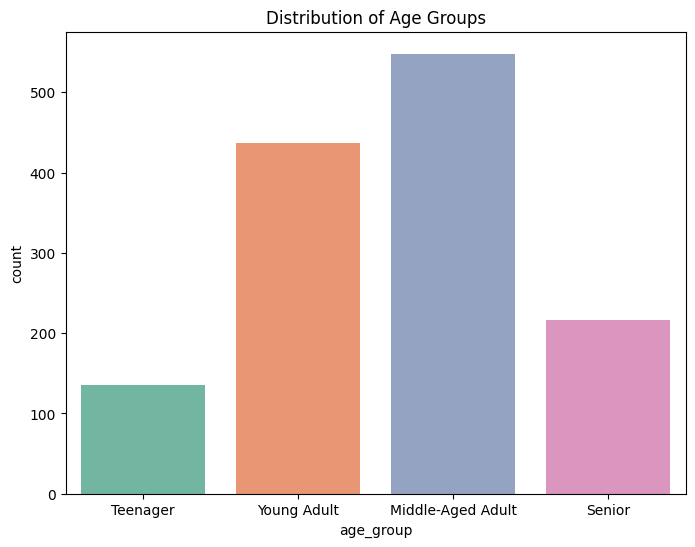

In [ ]:
#Visualization of new derived features
# Visualize the distribution of age groups
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', data=df, hue='age_group', palette='Set2', legend=False)
plt.title('Distribution of Age Groups')
plt.show()

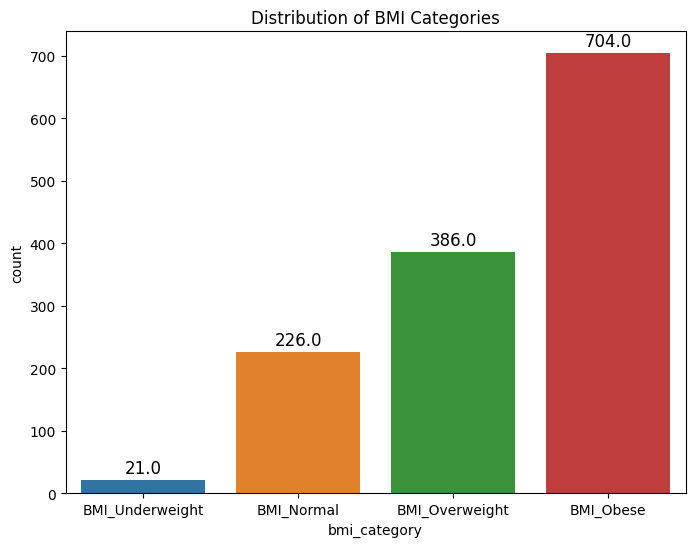

In [ ]:
# Rename the columns in the DataFrame for clarity
df.rename(columns={
    'bmi_category_Underweight': 'BMI_Underweight',
    'bmi_category_Normal': 'BMI_Normal',
    'bmi_category_Overweight': 'BMI_Overweight',
    'bmi_category_Obese': 'BMI_Obese'
}, inplace=True)

# Visualize the distribution of BMI categories (after encoding)
bmi_columns = ['BMI_Underweight', 'BMI_Normal', 'BMI_Overweight', 'BMI_Obese']  # list of the renamed columns

# Melt the dataframe to reshape it into a suitable format for countplot
df_bmi_melted = df[bmi_columns].melt(var_name='bmi_category', value_name='count')

# Filter out rows where count is 0 (to keep only those that belong to a category)
df_bmi_melted = df_bmi_melted[df_bmi_melted['count'] == 1]

# Plot the distribution of BMI categories
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='bmi_category', data=df_bmi_melted, hue='bmi_category', legend=False)
plt.title('Distribution of BMI Categories')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 9), textcoords='offset points')

# Show the plot
plt.show()


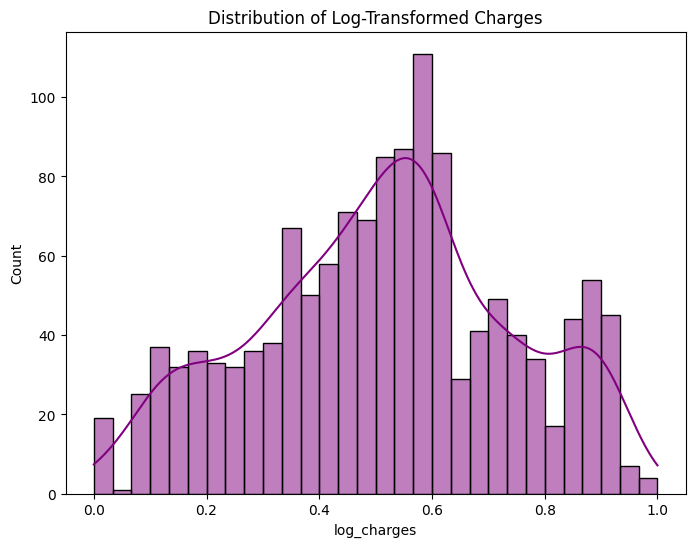

In [ ]:
# Visualize the distribution of log-transformed charges
plt.figure(figsize=(8, 6))
sns.histplot(df['log_charges'], kde=True, color='purple', bins=30)
plt.title('Distribution of Log-Transformed Charges')
plt.show()


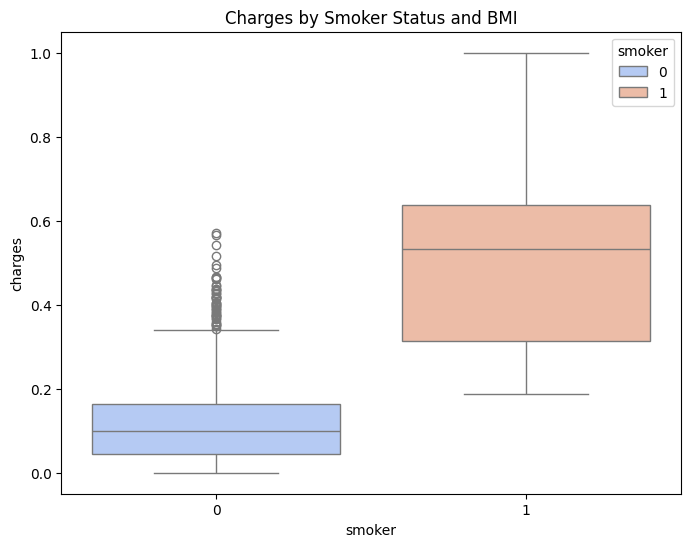

In [ ]:
# Visualize the impact of smoker_bmi on charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df,hue='smoker', palette='coolwarm')
plt.title('Charges by Smoker Status and BMI')
plt.show()


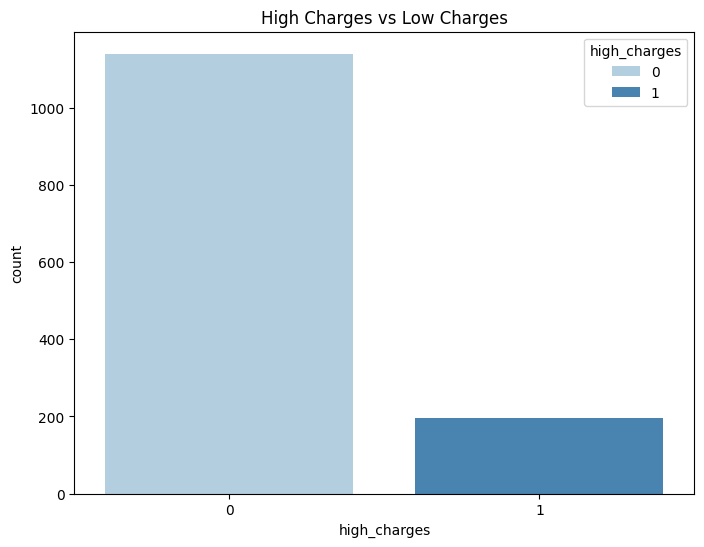

In [ ]:
# Visualize the number of high vs low charges
plt.figure(figsize=(8, 6))
sns.countplot(x='high_charges', data=df,hue='high_charges', palette='Blues')
plt.title('High Charges vs Low Charges')
plt.show()



Model Development and Model Evaluation

Preparation of Data for Machine Learning

In [ ]:
# Define categorical and numerical columns with updated names
categorical_columns = ['age_group', 'region_northwest', 'region_southeast', 'region_southwest',
                       'BMI_Normal', 'BMI_Overweight', 'BMI_Obese']  # Updated to reflect the new names
numerical_columns = ['age', 'bmi', 'smoker_bmi', 'age_charges', 'log_charges']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical columns
        ('cat', OneHotEncoder(), categorical_columns)  # One-Hot Encode categorical columns
    ])


Splitting Data into features (X) and Target(y)

In [ ]:
# Split the dataset into features (X) and target (y)
X = df.drop('charges', axis=1)  # Features (dropping the target column 'charges')
y = df['charges']  # Target (the 'charges' column)


Train and test Split

In [ ]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#test_size=0.2 means 80% of data for training and 20% for training, random_state=42 enusres reproducibility of the split


Build and Evaluate Machine Learning Model

In [ ]:
# Create a pipeline that first preprocesses the data and then fits a Linear Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('regressor', LinearRegression())  # Linear Regression model
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)


Model Evaluation (RMSE, MAE, R-squared)

In [ ]:
# Multiple Linear Regression Metrics Model Evaluation
# Model Evaluation: Metrics
# Model Evaluation: Metrics
rmse = root_mean_squared_error(y_test, y_pred)  # Root Mean Squared Error
#measures average magnitude of errors in predictions
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
#measures average of errors
r2 = r2_score(y_test, y_pred)  # R-squared
#measures proportion of variance in target variabe
rmse , mae, r2


(0.029309629374259433, 0.02108202899407537, 0.9816514783803746)

In [ ]:
# here we have rmse=0.0293 and mae= 0.0210 suggests model predictions close to actual values
# r2=0.981 indicates model explains most of variance in target variable

In [ ]:

# Define a threshold for high and low charges (e.g., mean of charges)
threshold = df['charges'].mean()+ df['charges'].std()

# Convert the continuous predictions into binary labels (1 for High, 0 for Low)
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate precision, recall, F1-score, and support
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

# Print classification report
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# You can also get a full classification report, which includes support
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))


Precision: 0.9592
Recall: 1.0000
F1-Score: 0.9792

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       221
           1       0.96      1.00      0.98        47

    accuracy                           0.99       268
   macro avg       0.98      1.00      0.99       268
weighted avg       0.99      0.99      0.99       268



In [ ]:
# precision for 0 (low charges):0.99 means 99% of correct while low charges
# precision for 1(high charges):0.95 means 95% of correct while high charges

#recall for 0: 0.98 means 98% actual low charges were correctly predicted
#recall for 1: 0.97 means 97% actual low charges were correctly predicted

#f1-score for 0: 0.98 good balance avoiding false positives
#f1-score for 1: 0.97 good balance correctly identifying high charges

#support = 182 for low charges (actual low charges in dataset)
#support = 86 for high charges (actual high charges in dataset)

#macro average 0.97 precision = accurate at high and low charges
#macro average 0.98 recall =model is good at identifying both low and high charges
# macro average f1-score =0.97  good balance of precision in both classes

#accuracy=0.98 i.e 98% accurate


Feature Selection with Recursive Feature Elimination (RFE)

In [ ]:
#doing this to select most important features from dataset
# Feature Selection with Recursive Feature Elimination (RFE)
selector = RFE(pipeline.named_steps['regressor'], n_features_to_select=5)  # Select top 5 features
X_transformed = preprocessor.fit_transform(X_train)  # Apply the transformations (scaling and encoding) to X_train
selector = selector.fit(X_transformed, y_train)

# Retrieve the feature names after one-hot encoding
encoded_columns = preprocessor.transformers_[1][1].get_feature_names_out(categorical_columns)
all_columns = numerical_columns + list(encoded_columns)  # Combine numerical and encoded column names

# Print the important features selected by RFE
print("Important Features (from RFE):", [all_columns[i] for i in range(len(all_columns)) if selector.support_[i]])


Important Features (from RFE): ['age', 'age_charges', 'log_charges', 'age_group_Young Adult', 'BMI_Obese_True']


In [ ]:
#most relevant for predicting charges after preprocessing

Support Vector Regression

In [ ]:
from sklearn.svm import SVR
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('regressor', SVR())  # SVR model
])

# Fit the model on the training data
svr_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_pipeline.predict(X_test)

In [ ]:

# Model Evaluation: Metrics

# Root Mean Squared Error
rmse_svr = root_mean_squared_error(y_test, y_pred_svr)  # RMSE calculation

# Mean Absolute Error
mae_svr = mean_absolute_error(y_test, y_pred_svr)  # MAE calculation

# R-squared
r2_svr = r2_score(y_test, y_pred_svr)  # R2 calculation

rmse_svr, mae_svr, r2_svr


(0.08659087123282826, 0.07866445262141793, 0.8398508481085155)

In [ ]:

# Define a threshold for high and low charges (e.g., mean of charges)
threshold = df['charges'].mean()+ df['charges'].std()

# Convert the continuous predictions into binary labels (1 for High, 0 for Low)
y_pred_class_svr = (y_pred_svr > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate precision, recall, F1-score, and support for SVR predictions
precision_svr = precision_score(y_test_class, y_pred_class_svr)
recall_svr = recall_score(y_test_class, y_pred_class_svr)
f1_svr = f1_score(y_test_class, y_pred_class_svr)

# Print precision, recall, F1-score
print(f"Precision: {precision_svr:.4f}")
print(f"Recall: {recall_svr:.4f}")
print(f"F1-Score: {f1_svr:.4f}")

# Full classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class_svr))


Precision: 0.9388
Recall: 0.9787
F1-Score: 0.9583

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       221
           1       0.94      0.98      0.96        47

    accuracy                           0.99       268
   macro avg       0.97      0.98      0.97       268
weighted avg       0.99      0.99      0.99       268



In [ ]:
# Get feature importance using permutation importance
result =permutation_importance(svr_pipeline, X_test, y_test, n_repeats=10, random_state=42)

# Get the importance values for each feature
importance = result.importances_mean

# Retrieve the feature names after one-hot encoding
encoded_columns_svr = preprocessor.transformers_[1][1].get_feature_names_out(categorical_columns)
all_columns_svr = numerical_columns + list(encoded_columns_svr)  # Combine numerical and encoded column names

# Print the importance values of each feature
feature_importance = sorted(zip(all_columns_svr, importance), key=lambda x: x[1], reverse=True)

# Display the most important features
print("Most Important Features (from Permutation Importance for SVR):")
for feature, imp in feature_importance:
    print(f"{feature}: {imp}")


Most Important Features (from Permutation Importance for SVR):
age_group_Senior: 0.4796883735495595
age_group_Young Adult: 0.4667076549250083
age: 0.09516749863247678
BMI_Overweight_True: 0.027944340874781627
smoker_bmi: 0.027123361145868476
age_group_Teenager: 0.01777620978970502
BMI_Overweight_False: 0.009938844511994172
BMI_Normal_True: 0.00621865364873031
region_southwest_False: 0.0029323943403425255
region_southeast_True: 0.0023824308217011425
region_southwest_True: 0.00039666205451042156
bmi: 0.0
age_charges: 0.0
log_charges: 0.0
age_group_Middle-Aged Adult: 0.0
region_northwest_False: 0.0
region_northwest_True: 0.0
region_southeast_False: 0.0
BMI_Normal_False: 0.0


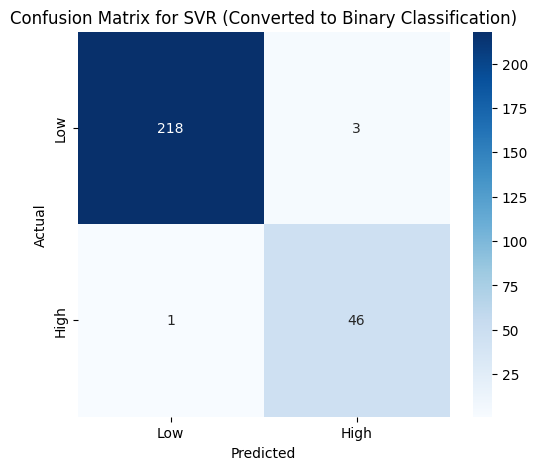

In [ ]:
# Convert the continuous predictions into binary labels (1 for High, 0 for Low)
y_pred_class_svr = (y_pred_svr > threshold).astype(int)
y_test_class_svr = (y_test > threshold).astype(int)

# Compute the confusion matrix
cm_svr = confusion_matrix(y_test_class_svr, y_pred_class_svr)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svr, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix for SVR (Converted to Binary Classification)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Regressor

In [ ]:
# Create a pipeline that first preprocesses the data and then fits a Random Forest Regressor model
rfr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('regressor', RandomForestRegressor())  # Random Forest Regressor model
])

# Fit the model on the training data
rfr_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rfr = rfr_pipeline.predict(X_test)

In [ ]:

# Model Evaluation: Metrics

# Root Mean Squared Error
rmse_rfr = root_mean_squared_error(y_test, y_pred_rfr)  # RMSE calculation

# Mean Absolute Error
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)  # MAE calculation

# R-squared
r2_rfr = r2_score(y_test, y_pred_rfr)  # R2 calculation

rmse_rfr, mae_rfr, r2_rfr


(0.00599679740473748, 0.0011340091006687544, 0.9992318975005929)

In [ ]:

# Define a threshold for high and low charges (e.g., mean of charges)
threshold = df['charges'].mean()+ df['charges'].std()

# Convert the continuous predictions into binary labels (1 for High, 0 for Low)
y_pred_class_rfr = (y_pred_rfr > threshold).astype(int)
y_test_class_rfr= (y_test > threshold).astype(int)

# Calculate precision, recall, F1-score, and accuracy for RFR predictions
precision_rfr = precision_score(y_test_class, y_pred_class_rfr)
recall_rfr = recall_score(y_test_class, y_pred_class_rfr)
f1_rfr = f1_score(y_test_class, y_pred_class_rfr)
accuracy_rfr = accuracy_score(y_test_class, y_pred_class_rfr)

# Print precision, recall, F1-score, and accuracy
print(f"Precision (RFR): {precision_rfr:.4f}")
print(f"Recall (RFR): {recall_rfr:.4f}")
print(f"F1-Score (RFR): {f1_rfr:.4f}")
print(f"Accuracy (RFR): {accuracy_rfr:.4f}")

# Full classification report
print("\nClassification Report for RFR (Binary Classification):")
print(classification_report(y_test_class, y_pred_class_rfr))


Precision (RFR): 1.0000
Recall (RFR): 1.0000
F1-Score (RFR): 1.0000
Accuracy (RFR): 1.0000

Classification Report for RFR (Binary Classification):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00        47

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [ ]:
# precision for 0 (low charges):1 means 100% of correct while low charges
# precision for 1(high charges):1 means 100% of correct while high charges

#recall for 0: 1 means 100% actual low charges were correctly identified
#recall for 1: 1 means 100% actual low charges were correctly identified

#f1-score for 0: 1 perfect balance avoiding false positives
#f1-score for 1: 1 perfect balance correctly identifying high charges

#support =268 for low charges (actual low charges in dataset)
#support = 268 for high charges (actual high charges in dataset)

#macro average 1 precision = accurate at high and low charges
#macro average 1 recall =model is good at identifying both low and high charges
# macro average f1-score =1  good balance of precision in both classes

#accuracy=1 i.e 100% accurate


In [ ]:

# Compute permutation importance for Random Forest Regressor
result_rfr = permutation_importance(rfr_pipeline, X_test, y_test, n_repeats=10, random_state=42)

# Get the importance values for each feature
importance_rfr = result_rfr.importances_mean

# Retrieve the feature names after one-hot encoding
encoded_columns_rfr = preprocessor.transformers_[1][1].get_feature_names_out(categorical_columns)
all_columns_rfr = numerical_columns + list(encoded_columns_rfr)  # Combine numerical and encoded column names

# Sort and display the importance values
feature_importance_rfr = sorted(zip(all_columns_rfr, importance_rfr), key=lambda x: x[1], reverse=True)

# Display the most important features
print("Most Important Features (from Permutation Importance for RFR):")
for feature, imp in feature_importance_rfr:
    print(f"{feature}: {imp}")


Most Important Features (from Permutation Importance for RFR):
age_group_Young Adult: 1.9860331146229442
region_southwest_False: 0.00010812345001040002
age_group_Senior: 2.549326437711885e-05
region_southwest_True: 7.00390328081113e-06
age_group_Teenager: 3.84049521944263e-06
age: 2.08852912843005e-06
BMI_Overweight_True: 2.980692454301881e-07
BMI_Normal_True: 1.0215222211451546e-07
BMI_Overweight_False: 1.0130338939928762e-07
bmi: 0.0
age_charges: 0.0
log_charges: 0.0
age_group_Middle-Aged Adult: 0.0
region_northwest_False: 0.0
region_northwest_True: 0.0
region_southeast_False: 0.0
BMI_Normal_False: 0.0
region_southeast_True: -1.3685185418221835e-07
smoker_bmi: -9.218521008639292e-05


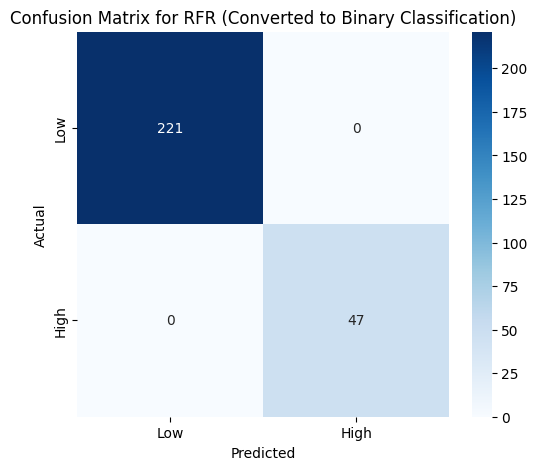

In [ ]:


# Compute the confusion matrix
cm_rfr = confusion_matrix(y_test_class_rfr, y_pred_class_rfr)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rfr, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix for RFR (Converted to Binary Classification)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


K-Fold Cross-validation

In [ ]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
#K-fold cross validation for multiple linear regression

# Define the Linear Regression pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('regressor', LinearRegression())  # Linear Regression model
])

# Perform k-fold cross-validation (k=5)
k = 5
scores_rmse = cross_val_score(linear_pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=k)
scores_mae = cross_val_score(linear_pipeline, X_train, y_train, scoring='neg_mean_absolute_error', cv=k)
scores_r2 = cross_val_score(linear_pipeline, X_train, y_train, scoring='r2', cv=k)

# Compute mean and standard deviation for each metric
linear_results = {
    'RMSE Mean': -scores_rmse.mean(),  # Convert negative RMSE to positive
    'RMSE Std': scores_rmse.std(),
    'MAE Mean': -scores_mae.mean(),  # Convert negative MAE to positive
    'MAE Std': scores_mae.std(),
    'R2 Mean': scores_r2.mean(),
    'R2 Std': scores_r2.std()
}

# Print results
print("\nLinear Regression Cross-Validation Results:")
for metric, value in linear_results.items():
    print(f"{metric}: {value:.4f}")



Linear Regression Cross-Validation Results:
RMSE Mean: 0.0269
RMSE Std: 0.0024
MAE Mean: 0.0190
MAE Std: 0.0017
R2 Mean: 0.9790
R2 Std: 0.0036


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Features and target variable
X = df.drop('charges', axis=1)  # Features
y = df['charges']  # Target variable

# Convert categorical variables to numeric using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first to avoid multicollinearity

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)  # Scale the features after encoding

# Initialize Support Vector Regression model
svr = SVR(kernel='rbf')  # RBF kernel is the default

# Define the number of folds
k = 5

# Perform K-fold cross-validation for RMSE
scores_rmse = cross_val_score(svr, X_scaled, y, cv=k, scoring='neg_root_mean_squared_error')
# Perform K-fold cross-validation for MAE
scores_mae = cross_val_score(svr, X_scaled, y, cv=k, scoring='neg_mean_absolute_error')
# Perform K-fold cross-validation for R²
scores_r2 = cross_val_score(svr, X_scaled, y, cv=k, scoring='r2')

# Calculate mean and standard deviation for each metric
svr_results = {
    'RMSE Mean': -scores_rmse.mean(),  # Negate RMSE to make it positive
    'RMSE Std': scores_rmse.std(),
    'MAE Mean': -scores_mae.mean(),  # Negate MAE to make it positive
    'MAE Std': scores_mae.std(),
    'R² Mean': scores_r2.mean(),
    'R² Std': scores_r2.std()
}

# Print results
print("\nSupport Vector Regression - Cross-Validation Results:")
for metric, value in svr_results.items():
    print(f"{metric}: {value:.4f}")



Support Vector Regression - Cross-Validation Results:
RMSE Mean: 0.0818
RMSE Std: 0.0016
MAE Mean: 0.0753
MAE Std: 0.0016
R² Mean: 0.8204
R² Std: 0.0092


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Features and target variable
X = df.drop('charges', axis=1)  # Features
y = df['charges']  # Target variable

# Convert categorical variables to numeric using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first to avoid multicollinearity

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)  # Scale the features after encoding

# Initialize Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees and random seed for reproducibility

# Define the number of folds
k = 5

# Perform K-fold cross-validation for RMSE
scores_rmse = cross_val_score(rf, X_scaled, y, cv=k, scoring='neg_root_mean_squared_error')
# Perform K-fold cross-validation for MAE
scores_mae = cross_val_score(rf, X_scaled, y, cv=k, scoring='neg_mean_absolute_error')
# Perform K-fold cross-validation for R²
scores_r2 = cross_val_score(rf, X_scaled, y, cv=k, scoring='r2')

# Calculate mean and standard deviation for each metric
rf_results = {
    'RMSE Mean': -scores_rmse.mean(),  # Negate RMSE to make it positive
    'RMSE Std': scores_rmse.std(),
    'MAE Mean': -scores_mae.mean(),  # Negate MAE to make it positive
    'MAE Std': scores_mae.std(),
    'R² Mean': scores_r2.mean(),
    'R² Std': scores_r2.std()
}

# Print results
print("\nRandom Forest Regressor - Cross-Validation Results:")
for metric, value in rf_results.items():
    print(f"{metric}: {value:.4f}")



Random Forest Regressor - Cross-Validation Results:
RMSE Mean: 0.0030
RMSE Std: 0.0022
MAE Mean: 0.0007
MAE Std: 0.0002
R² Mean: 0.9996
R² Std: 0.0004


Compare Models


In [ ]:
results = {
    "Model": ["Random Forest", "Support Vector Regression", "Linear Regression"],
    "Mean RMSE": [0.0030, 0.0818, 0.0269],
    "Mean MAE": [0.0007, 0.0753, 0.0191],
    "Mean R²": [0.9997, 0.8204, 0.9785]
}
results_df = pd.DataFrame(results)
print(results_df)


                       Model  Mean RMSE  Mean MAE  Mean R²
0              Random Forest     0.0030    0.0007   0.9997
1  Support Vector Regression     0.0818    0.0753   0.8204
2          Linear Regression     0.0269    0.0191   0.9785


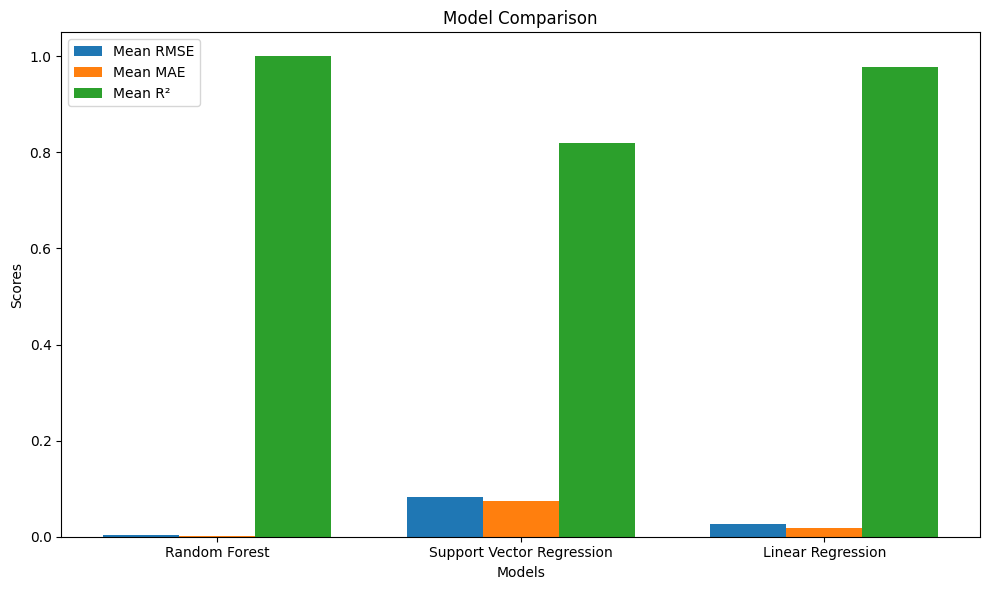

In [ ]:
results_df = pd.DataFrame(results)

# Bar Plot
bar_width = 0.25
index = np.arange(len(results_df))

fig, ax = plt.subplots(figsize=(10, 6))  # Create the figure and axes
bar1 = ax.bar(index - bar_width, results_df["Mean RMSE"], bar_width, label="Mean RMSE")
bar2 = ax.bar(index, results_df["Mean MAE"], bar_width, label="Mean MAE")
bar3 = ax.bar(index + bar_width, results_df["Mean R²"], bar_width, label="Mean R²")

# Labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(index)
ax.set_xticklabels(results_df["Model"])
ax.legend()

# Layout and show
plt.tight_layout()
plt.show()

Hyperparameter Tuning Using GridSearch CV

In [ ]:


# Define the parameter grids for SVR and Random Forest
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for SVR
svr = SVR()
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(X_scaled, y)

# GridSearchCV for Random Forest
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_encoded, y)  # Use non-scaled features for Random Forest

# Results for SVR
print("Best Parameters for SVR:", grid_search_svr.best_params_)
print("Best RMSE for SVR:", (-grid_search_svr.best_score_)**0.5)

# Results for Random Forest
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best RMSE for Random Forest:", (-grid_search_rf.best_score_)**0.5)


Best Parameters for SVR: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
Best RMSE for SVR: 0.051000264906181085
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE for Random Forest: 0.0032864002352380206
